In [31]:
library(Synth)
library(LowRankQP)
library(conflicted)
library(dplyr)
library(rvest)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(googlesheets4)
library(skimr)
library(kableExtra)
library(ggthemes)
library(stargazer)
library(kableExtra)

In [34]:
link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSkKDNXnPQtVgcWS8qwamdfd6Mrxb4ON3ul-R5s4LrTGVnxg3tVuNypORQUELFjlhD2GvcSjUQMMmyr/pub?output=csv"
data <- read.csv(link, header=TRUE)
head(data)

,year,state_num,state_abbr,state_name,total.crimes,population,total.crimes_per_population,violent_crime,violent_crime_per_population,homicide,...,gdp,median_household_income,Bodycam_Policy,kills_per_million,treatment,dem_majority,dem_governor,white.population,poc_percentage_population,poc_killed_by_police_percentage
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,...,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,2013,0,AL,Alabama,365338,4833996,0.07557681,20834,0.004309892,346,...,193981.5,42849,0,4.35,0,0,0,3437356,0.2889204,76.19047619
2,2014,0,AL,Alabama,349628,4846411,0.07214163,20727,0.004276773,276,...,197064.4,42830,0,3.72,0,0,0,3440563,0.2900802,41.17647059
3,2015,0,AL,Alabama,335484,4853875,0.06911674,22957,0.004729623,348,...,203113.3,44765,0,3.71,0,0,0,3441742,0.2909290,38.88888889
4,2016,0,AL,Alabama,338274,4860545,0.06959590,25878,0.005324094,407,...,208824.3,46257,0,5.14,0,0,0,3445802,0.2910667,28
5,2017,0,AL,Alabama,338486,4875120,0.06943132,25469,0.005224282,419,...,216615.5,48123,0,5.33,0,0,0,3450537,0.2922150,34.61538462
6,2018,0,AL,Alabama,328538,4887681,0.06721756,25567,0.005230906,383,...,226263.8,49861,0,3.27,0,0,0,3457921,0.2925232,35.71428571


In [47]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 29

# excluded_states <- c(6, 30, 5, 12, 19) # Exclude Conneticut, New Mexico, Colorado, Illinois, and Maryland
excluded_states <- c("Conneticut", "New Mexico", "Colorado", "Illinois", "Maryland") # Exclude Conneticut, New Mexico, Colorado, Illinois, and Maryland

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2021

dataprep_out <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicity_per_populaiton"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2021,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2021,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out <- synth(dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.07931061 

solution.v:
 0.321603 0.3355481 0.004925731 0.01914117 0.1503676 0.01617511 0.1522392 

solution.w:
 1.522e-07 5.7e-09 5.7e-09 2.62e-08 0 0.1504305 2.709e-07 1.23e-08 9.86e-08 9.1e-09 3.5e-09 8.78e-08 4.4e-09 8.6e-09 5.4e-09 3.9826e-06 6e-10 0.4352109 3.62e-08 8.3e-09 0.02349392 8.74e-08 4.1e-09 6.2e-09 1.11e-08 2.8e-09 0.07121064 1.53322e-05 5.9e-09 0.2780011 5.6e-09 6.6e-09 1e-10 1.4493e-06 6.45788e-05 6.6e-09 3.2e-08 8.5e-09 3.9e-09 4.9e-09 0.04156668 6.6e-09 6.8e-09 9.3e-09 3.5e-09 



In [48]:
print(synth_out)


$solution.v
            kills_per_million       gdp poc_percentage_population dem_majority
Nelder-Mead          0.321603 0.3355481               0.004925731   0.01914117
            dem_governor violent_crime_per_population homicity_per_populaiton
Nelder-Mead    0.1503676                   0.01617511               0.1522392

$solution.w
       w.weight
0  1.521684e-07
1  5.697829e-09
2  5.669239e-09
3  2.618099e-08
4  7.777079e-12
6  1.504305e-01
7  2.709170e-07
8  1.228786e-08
9  9.863830e-08
10 9.083838e-09
11 3.501785e-09
13 8.778779e-08
14 4.371295e-09
15 8.586018e-09
16 5.368995e-09
17 3.982564e-06
18 5.870804e-10
20 4.352109e-01
21 3.617076e-08
22 8.308033e-09
23 2.349392e-02
24 8.744716e-08
25 4.094529e-09
26 6.217756e-09
27 1.110664e-08
28 2.763026e-09
31 7.121064e-02
32 1.533222e-05
33 5.904611e-09
34 2.780011e-01
35 5.617279e-09
36 6.641811e-09
37 6.494116e-11
38 1.449343e-06
39 6.457876e-05
40 6.556483e-09
41 3.203309e-08
42 8.479954e-09
43 3.862798e-09
44 4.920527e-09
45 4.

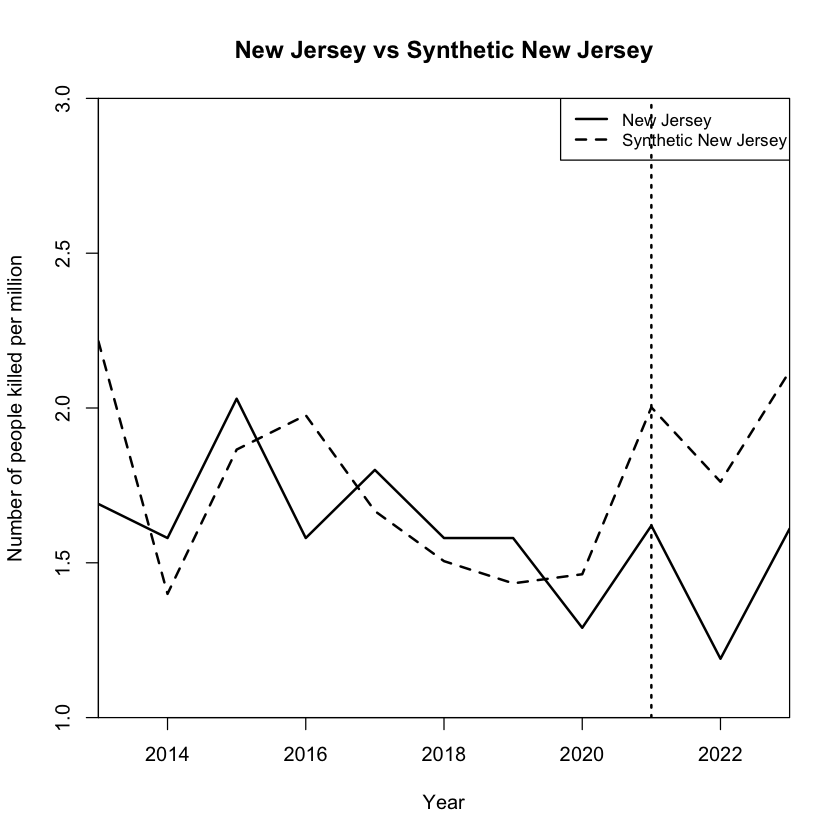

In [49]:
path.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2021,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Jersey", "Synthetic New Jersey"),
          Main = "New Jersey vs Synthetic New Jersey" ,
        Ylim = c(1,3)
          )


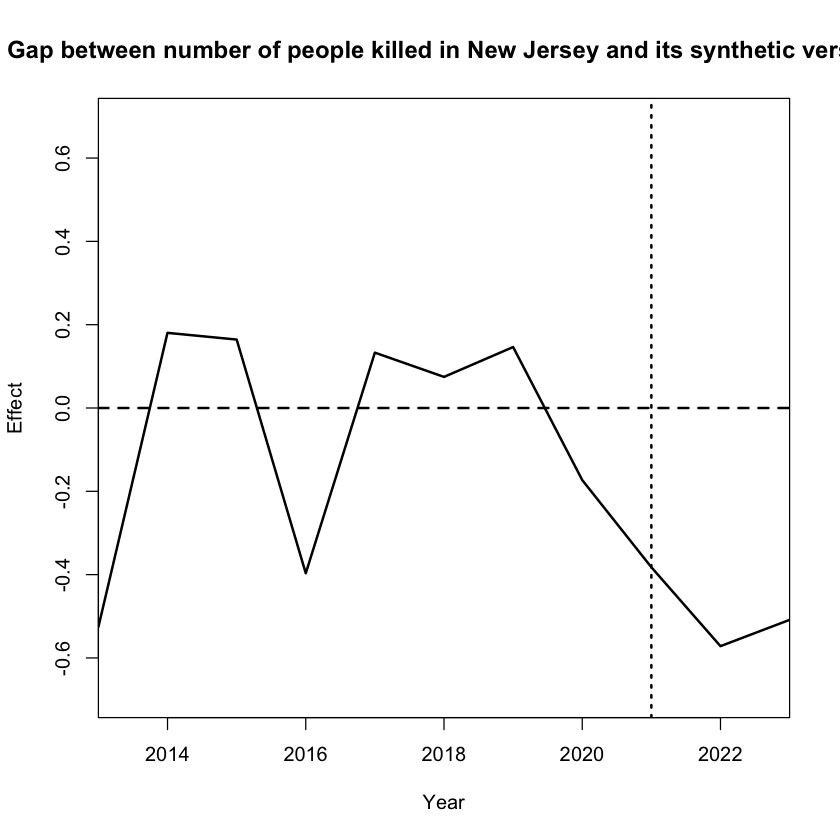

In [50]:
 gaps.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2021,
          Ylab = "Effect",
          Xlab = "Year",
          Main = " Gap between number of people killed in New Jersey and its synthetic version")


In [ ]:
gaps <- dataprep_out$Y1plot - (dataprep_out$Y0plot %*% synth_out$solution.w)

donor_weights <- synth_out$solution.w
donor_names <- donor_pool

# Create a data frame with weights, names, and spacing
donor_data <- data.frame(Weights = donor_weights, States = donor_names)

# Use stargazer to display the data frame
library(stargazer)
stargazer(donor_data, type = "text", summary = FALSE)



   w.weight     States    
--------------------------
0  0.00000     Alabama    
1     0         Alaska    
2     0        Arizona    
3  0.00000     Arkansas   
4     0       California  
6   0.150    Connecticut  
7  0.00000     Delaware   
8     0        Florida    
9  0.00000     Georgia    
10    0         Hawaii    
11    0         Idaho     
13 0.00000     Indiana    
14    0          Iowa     
15    0         Kansas    
16    0        Kentucky   
17 0.00000    Louisiana   
18    0         Maine     
20  0.435   Massachusetts 
21 0.00000     Michigan   
22    0       Minnesota   
23  0.023    Mississippi  
24 0.00000     Missouri   
25    0        Montana    
26    0        Nebraska   
27    0         Nevada    
28    0     New Hampshire 
31  0.071      New York   
32 0.00002  North Carolina
33    0      North Dakota 
34  0.278        Ohio     
35    0        Oklahoma   
36    0         Oregon    
37    0      Pennsylvania 
38 0.00000   Rhode Island 
39  0.0001  South Carolina
